In [1]:
import dill
import pandas as pd
from tqdm import tqdm
import sys
import pyLDAvis.sklearn
import matplotlib.pyplot

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../scripts')

import twitter
import text_analysis

#Look at topics related to #yanggang, #basicincome, and #ai
basicincome_tweets = dill.load(open('../scrapped_data/twitter-data/basicincome_tweets.pkd', 'rb'))
universalbasicincome_tweets = dill.load(open('../scrapped_data/twitter-data/universalbasicincome_tweets.pkd', 'rb'))
yanggang_tweets = dill.load(open('../scrapped_data/twitter-data/yang_gang_tweets', 'rb'))
ai_tweets = dill.load(open('../scrapped_data/twitter-data/ai_tweets.pkd', 'rb'))

# Look at topics related to Trump, Fake News, and Political Correctness
trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_tweets.pkd', 'rb'))
fakenews_tweets = dill.load(open('../scrapped_data/twitter-data/fakenews_tweets.pkd', 'rb'))
politicalcorrectness_tweets = dill.load(open('../scrapped_data/twitter-data/politicalcorrectness_tweets.pkd', 'rb'))

# Bernie Tweets
berniebros_tweets = dill.load(open('../scrapped_data/twitter-data/berniebros_tweets.pkd', 'rb'))

# Some Initial EDA

So let us do some initial exploratory data analysis. First, let us check what our common hashtags, and the platform they are coming from.

## Twitter Popularity
Now, let us do a plot of our contestents Twitter activity. I will be measuring two quantitents

1. Retweet count,
2. favorite count.

This will give a proxy for each one's popularity.

### Andrew Yang

In [2]:
andrew_yang_tweets = dill.load(open('../scrapped_data/twitter-data/yang-tweets.pkd', 'rb'))

In [3]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in andrew_yang_tweets],
                   'retweets': [tweet.retweet_count for tweet in andrew_yang_tweets],
                   'favorite_count': [tweet.favorite_count for tweet in andrew_yang_tweets]})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b16eaea90>,
      dtype=object)

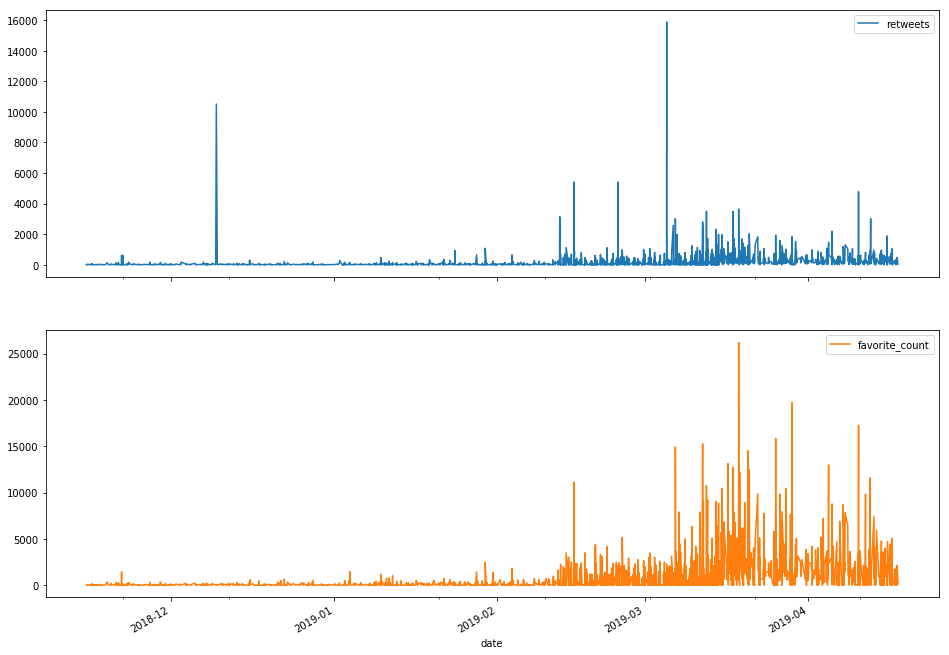

In [4]:
df.plot(x='date', subplots=True, figsize=(16, 12))

### Bernie Sanders

In [5]:
bernie_sanders_tweets = dill.load(open('../scrapped_data/twitter-data/sanders-tweets.pkd', 'rb'))

In [6]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in bernie_sanders_tweets],
                   'retweets': [tweet.retweet_count for tweet in bernie_sanders_tweets],
                   'favorite_count': [tweet.favorite_count for tweet in bernie_sanders_tweets]})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b167e5978>,
      dtype=object)

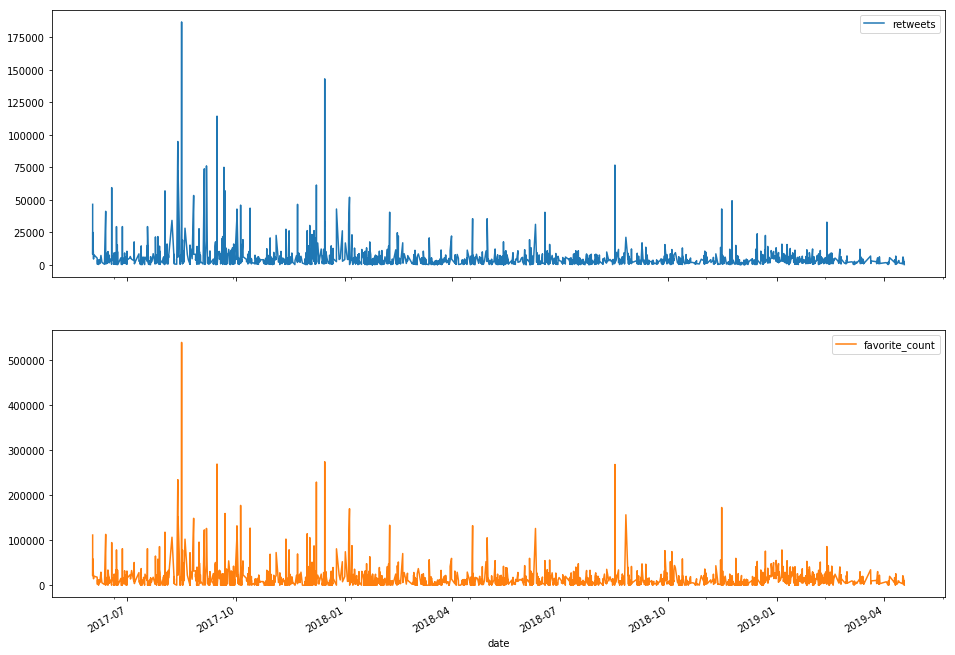

In [7]:
df.plot(x='date', subplots=True, figsize=(16, 12))

### Donald Trump

In [8]:
donald_trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_personal_tweets.pkd', 'rb'))

In [9]:
df = pd.DataFrame({'date': [tweet.created_at for tweet in donald_trump_tweets],
                   'retweets': [tweet.retweet_count for tweet in donald_trump_tweets],
                   'favorite_count': [tweet.favorite_count for tweet in donald_trump_tweets]})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b13b3df28>,
      dtype=object)

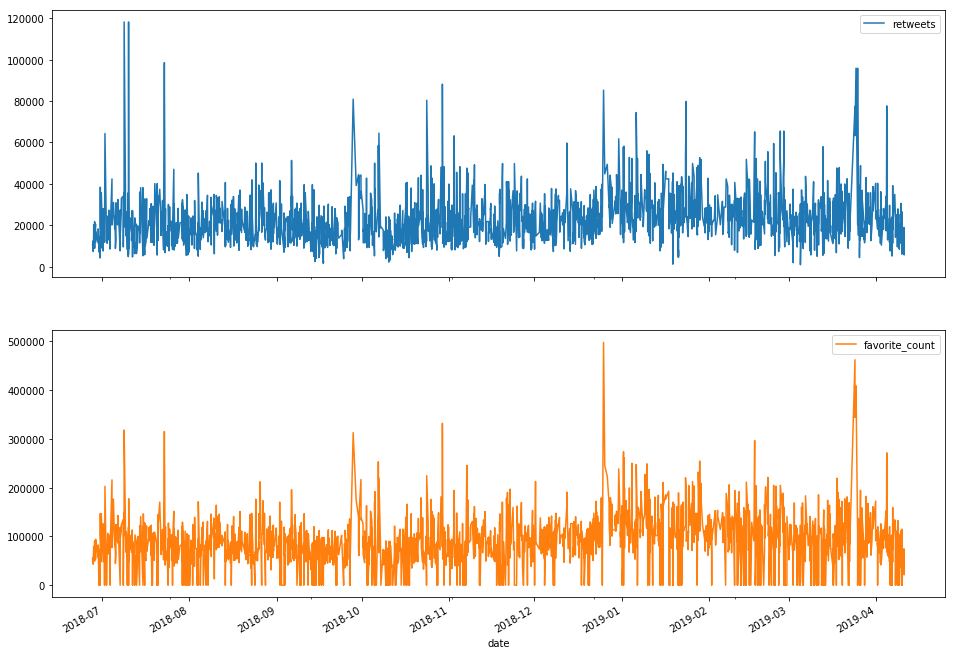

In [10]:
df.plot(x='date', subplots=True, figsize=(16, 12))

# Topic Analysis

Next, I gathered Twitter data related to several popular hashtags. The hashtags I chose as relavent are mostly pertinent to issues each campaigner brings up. They are as follows.

1. Andrew Yang
    * #universalbasicincome,
    * #yanggang
    

2. Bernie Sanders
    * #berniebros
    

3. Donald Trump
    * #fakenews,
    * #politicalcorrectness
    * #trump
    
I used [ritetag](https://ritetag.com) to determine some of the hashtags I should be paying attention to. Note at the moment that issues Bernie Sanders is concerned with do not have nice simple hashtags that pop up. This makes EDA somewhat difficult in this case.

First, let's do a basic plot of what kind of people these tweets are coming from.

In [11]:
sources = ['Twitter for Android', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web Client']

basic = pd.DataFrame({'source': ['Andoid', 'iPhone', 'iPad', 'Web Client'],
                      'basicincome': [[tweet.source for tweet in basicincome_tweets].count(s) for s in sources],
                      'yanggang': [[tweet.source for tweet in yanggang_tweets].count(s) for s in sources],
                      'trump': [[tweet.source for tweet in trump_tweets].count(s) for s in sources],
                      'fakenews': [[tweet.source for tweet in fakenews_tweets].count(s) for s in sources],
                      'politicalcorrectness': [[tweet.source for tweet in politicalcorrectness_tweets].count(s) for s in sources]})

[Text(0, 0, 'Andoid'),
 Text(0, 0, 'iPhone'),
 Text(0, 0, 'iPad'),
 Text(0, 0, 'Web Client')]

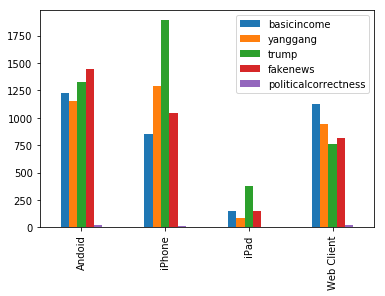

In [12]:
import matplotlib.pyplot

ax = basic.plot(kind='bar')
ax.set_xticklabels(['Andoid', 'iPhone', 'iPad', 'Web Client'])

There isn't any probably any series connection. We could do a $\chi^2$-test to confirm this. The one exception would be is that "Trump" gathers a lot of iPhone users. This could be because Donald Trump, being known as a iPhone user, tweets a lot. Or it could be something inherent about iPhone users. I'm just asking questions here.

Second, why not more love for the iPad?

## Andrew Yang

### Basic Income

In [13]:
text = twitter.Tweets(basicincome_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 4377/4377 [00:01<00:00, 3435.05it/s]


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
2       3.204192  -37.665989       1        1  12.173174
4     -66.476288   44.802242       2        1  12.057380
6      -8.841821   80.478859       3        1  11.880199
7      62.991905   -3.422405       4        1  10.872014
9      54.806660   57.166485       5        1  10.400144
0       9.564170 -100.091461       6        1  10.019092
5      -2.475587   18.054565       7        1  10.018363
1      67.199860  -64.416641       8        1   9.678136
3     -62.260189  -16.189833       9        1   7.479361
8     -54.083179  -76.777985      10        1   5.422137, topic_info=     Category         Freq                   Term        Total  loglift  \
term                                                                      
1427  Default   322.000000                    job   322.000000  30.0000   
2847  Default   365.000000                   work   365.000000  29.0000   
179   Default   282.000000             andrewyang   282.000000  28.0000   
2061  Default   209.000000                program   209.000000  27.0000   
1482  Default   207.000000                   know   207.000000  26.0000   
1275  Default   186.000000                   idea   186.000000  25.0000   
2014  Default   286.000000                poverty   286.000000  24.0000   
2723  Default   478.000000              universal   478.000000  23.0000   
291   Default   209.000000         basicincomecdn   209.000000  22.0000   
1188  Default   161.000000                  happy   161.000000  21.0000   
2692  Default   727.000000                    ubi   727.000000  20.0000   
491   Default   156.000000                citizen   156.000000  19.0000   
2877  Default   154.000000               yanggang   154.000000  18.0000   
2502  Default   163.000000              subreddit   163.000000  17.0000   
1801  Default   367.000000                    new   367.000000  16.0000   
1309  Default  1070.000000                 income  1070.000000  15.0000   
2309  Default   654.000000           scottsantens   654.000000  14.0000   
282   Default   967.000000                  basic   967.000000  13.0000   
1933  Default   414.000000                 people   414.000000  12.0000   
1794  Default   289.000000                   need   289.000000  11.0000   
288   Default  2583.000000            basicincome  2583.000000  10.0000   
2873  Default   172.000000               yang2020   172.000000   9.0000   
297   Default   161.000000         basicincomeorg   161.000000   8.0000   
2561  Default   185.000000                    tax   185.000000   7.0000   
1165  Default   102.000000              guarantee   102.000000   6.0000   
171   Default   170.000000                    amp   170.000000   5.0000   
1002  Default   138.000000              financial   138.000000   4.0000   
2528  Default   136.000000                support   136.000000   3.0000   
1007  Default   171.000000                finland   171.000000   2.0000   
2481  Default    95.000000                  story    95.000000   1.0000   
...       ...          ...                    ...          ...      ...   
728   Topic10    59.203192              determine    60.053241   2.9004   
1014  Topic10    57.959923                    fit    58.809975   2.9001   
2708  Topic10    57.834493                 unable    58.684539   2.9001   
748   Topic10    36.640038             disability    37.490313   2.8917   
735   Topic10    25.158412                     di    26.008477   2.8814   
2689  Topic10    24.715107                   type    25.570003   2.8807   
2157  Topic10    17.156681                reddito    18.006726   2.8663   
1353  Topic10    16.932085                insight    17.787564   2.8654   
1792  Topic10    16.622613              necessary    17.475215   2.8647   
447   Topic10    16.555749                 center    17.406338   2.8646   
1412  Topic10    15.274746         jamesrobichau

In this case, I am using this hashtag as a proxy for Universal Basic Income. There are a few things of concern here. Andrew Yang is commonly associated with this movement. Finland also of heavy interest at the moment. This is possibly due to an experimental A/B test Findland ran in 2017-2018 to study the effects of UBI, which [we still don't fully know the data on how that turned out](https://medium.com/basic-income/what-is-there-to-learn-from-finlands-basic-income-experiment-did-it-succeed-or-fail-54b8e5051f60). Also note that there is a lot of concern about the future of artificial intelligence and AI.

### Yang Gang

In [14]:
text = twitter.Tweets(yanggang_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 3909/3909 [00:01<00:00, 3240.35it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      360.673187   31.653929       1        1  18.461825
9       -9.501072   70.072144       2        1  15.005932
2     -142.283417 -123.246857       3        1  12.788760
5      251.363129 -168.826233       4        1   9.908557
7       40.714828 -287.636108       5        1   8.964087
4       57.268028 -101.804237       6        1   8.322884
6     -197.282486   94.089027       7        1   7.625273
0       -8.962165  261.739807       8        1   6.586197
3      207.044098  231.727875       9        1   6.411897
8      172.661758   41.922909      10        1   5.924588, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
26    Default   569.000000           2020   569.000000  30.0000  30.0000
1745  Default   337.000000           time   337.000000  29.0000  29.0000
1986  Default   419.000000  zach_graumann   419.000000  28.0000  28.0000
958   Default   411.000000           join   411.000000  27.0000  27.0000
421   Default   406.000000        country   406.000000  26.0000  26.0000
195   Default   400.000000           beat   400.000000  25.0000  25.0000
1786  Default   448.000000          trump   448.000000  24.0000  24.0000
1291  Default   396.000000           path   396.000000  23.0000  23.0000
1575  Default   393.000000         simple   393.000000  22.0000  22.0000
1819  Default   390.000000          unite   390.000000  21.0000  21.0000
247   Default   389.000000            box   389.000000  20.0000  20.0000
182   Default   389.000000         ballot   389.000000  19.0000  19.0000
480   Default   385.000000         defeat   385.000000  18.0000  18.0000
130   Default  1946.000000     andrewyang  1946.000000  17.0000  17.0000
0     Default   256.000000            000   256.000000  16.0000  16.0000
1712  Default   420.000000          thank   420.000000  15.0000  15.0000
467   Default   262.000000            day   262.000000  14.0000  14.0000
1936  Default   675.000000       yang2020   675.000000  13.0000  13.0000
849   Default   242.000000          human   242.000000  12.0000  12.0000
996   Default   283.000000             la   283.000000  11.0000  11.0000
719   Default   236.000000         friend   236.000000  10.0000  10.0000
778   Default   232.000000           grow   232.000000   9.0000   9.0000
1809  Default   228.000000        twitter   228.000000   8.0000   8.0000
372   Default   303.000000           come   303.000000   7.0000   7.0000
1301  Default   255.000000       pershing   255.000000   6.0000   6.0000
36    Default   215.000000            250   215.000000   5.0000   5.0000
128   Default   329.000000         andrew   329.000000   4.0000   4.0000
1953  Default  2893.000000       yanggang  2893.000000   3.0000   3.0000
1629  Default   247.000000         square   247.000000   2.0000   2.0000
295   Default   294.000000      candidate   294.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1375  Topic10    99.358372             pr   100.199641   2.8176  -3.1533
1969  Topic10    52.655339    yangsthetic    53.496645   2.8102  -3.7883
1043  Topic10    52.608967         little    53.450364   2.8102  -3.7892
1884  Topic10    32.766207           wave    33.607511   2.8007  -4.2627
1918  Topic10    23.763314          world    24.604605   2.7913  -4.5839
1854  Topic10    18.570558         vision    19.416965   2.7815  -4.8305
1703  Topic10    17.509979           team    18.351282   2.7791  -4.8893
780   Topic10    17.041450             gt    17.882783   2.7779  -4.9164
1432  Topic10    14.901530    rafidangelo    15.743229   2.7711  -5.0506
264   Topic10    13.467241        brother    14.308532   2.7655  -5.1518
1859  Topic10    10.872806          voter    11.714109   2.7515  -5.3658
196   Topic10     9.573025      beautiful    10.4

A few things of note here. First, Zach Graumann gets mentioned a lot, especially in the first topic. He works as a campaign manager for Andrew Yang. He is also often compared to Trump, which makes sense as if he wins the nomination, he will be Trump's main competitor.

## Bernie Sanders

In [15]:
text = twitter.Tweets(berniebros_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 2635/2635 [00:01<00:00, 2278.47it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7     -386.355194 -111.062019       1        1  31.634192
1     -186.818115   39.136127       2        1  11.248085
0        7.720176 -103.344177       3        1   8.931485
2      272.430786   -5.574051       4        1   8.012761
6      164.214233 -291.944000       5        1   7.379641
9     -361.238739  216.957611       6        1   7.191207
5      217.157227  299.340820       7        1   7.056366
8       34.253170  136.418121       8        1   6.667059
3     -163.971634 -292.555664       9        1   6.492712
4     -106.026054  352.072418      10        1   5.386493, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
266   Default  2087.000000       berniebros  2087.000000  30.0000  30.0000
1927  Default  1069.000000               rt  1069.000000  29.0000  29.0000
2311  Default   353.000000            trump   353.000000  28.0000  28.0000
259   Default   665.000000           bernie   665.000000  27.0000  27.0000
1059  Default   246.000000          hillary   246.000000  26.0000  26.0000
1306  Default   350.000000             like   350.000000  25.0000  25.0000
820   Default   187.000000            exjon   187.000000  24.0000  24.0000
1031  Default   166.000000             hate   166.000000  23.0000  23.0000
907   Default   145.000000           forget   145.000000  22.0000  22.0000
499   Default   141.000000     connieballou   141.000000  21.0000  21.0000
1483  Default   140.000000    muellerreport   140.000000  20.0000  20.0000
2396  Default   139.000000          victory   139.000000  19.0000  19.0000
411   Default   138.000000          central   138.000000  18.0000  18.0000
1371  Default   138.000000     manipulating   138.000000  17.0000  17.0000
126   Default   240.000000              amp   240.000000  16.0000  16.0000
1954  Default   271.000000          sanders   271.000000  15.0000  15.0000
2530  Default   115.000000            zebop   115.000000  14.0000  14.0000
389   Default   172.000000        candidate   172.000000  13.0000  13.0000
2247  Default   155.000000            think   155.000000  12.0000  12.0000
2167  Default   192.000000        supporter   192.000000  11.0000  11.0000
1332  Default   108.000000            looks   108.000000  10.0000  10.0000
278   Default   227.000000    berniesanders   227.000000   9.0000   9.0000
2436  Default   131.000000           warren   131.000000   8.0000   8.0000
288   Default   103.000000            biden   103.000000   7.0000   7.0000
1934  Default    96.000000           russia    96.000000   6.0000   6.0000
2374  Default    95.000000              use    95.000000   5.0000   5.0000
1524  Default    97.000000              new    97.000000   4.0000   4.0000
1696  Default    92.000000             poll    92.000000   3.0000   3.0000
2270  Default    85.000000            today    85.000000   2.0000   2.0000
2413  Default   256.000000             vote   256.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
80    Topic10     8.630363  adamparkhomenko     9.454867   2.8300  -5.1818
539   Topic10     8.208128           create     9.032496   2.8256  -5.2320
284   Topic10     8.016436         beto2020     8.840775   2.8234  -5.2556
503   Topic10     7.939099       conspiracy     8.765682   2.8222  -5.2653
2070  Topic10     7.469668        smileyt22     8.297878   2.8161  -5.3263
51    Topic10     7.223461             able     8.047814   2.8132  -5.3598
887   Topic10     7.028169           finger     7.852509   2.8104  -5.3872
885   Topic10     6.919424          finally     7.743716   2.8087  -5.4028
2014  Topic10     6.827483   shaunhensleyca     7.652308   2.8072  -5.4162
2162  Topic10     6.588455          suggest     7.413070   2.8033  -5.4518
2005  Topic10     6.354157          

## Donald Trump

### Trump

In [16]:
text = twitter.Tweets(trump_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 5048/5048 [00:02<00:00, 2421.66it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5      -16.917408   64.123375       1        1  17.710526
1       -1.932772  210.621979       2        1  14.013785
8     -186.047058  -70.753876       3        1  12.887338
7     -163.003860   97.640831       4        1  11.264800
9      -61.798267 -223.314621       5        1   9.079019
0       96.768295  -23.898886       6        1   7.927419
3      151.840775  124.358925       7        1   7.231632
2      109.672180 -181.677139       8        1   7.083428
4      -36.315685  -78.308449       9        1   6.574201
6      240.854828  -43.911766      10        1   6.227852, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
192   Default   419.000000              amp   419.000000  30.0000  30.0000
2812  Default   209.000000           return   209.000000  29.0000  29.0000
2892  Default   238.000000          russian   238.000000  28.0000  28.0000
871   Default   199.000000              day   199.000000  27.0000  27.0000
3262  Default   227.000000              tax   227.000000  26.0000  26.0000
2768  Default   247.000000  repmaxinewaters   247.000000  25.0000  25.0000
2890  Default   172.000000           russia   172.000000  24.0000  24.0000
3430  Default   365.000000          twitter   365.000000  23.0000  23.0000
3215  Default   255.000000          support   255.000000  22.0000  22.0000
2552  Default   491.000000        president   491.000000  21.0000  21.0000
2188  Default   360.000000          mueller   360.000000  20.0000  20.0000
1740  Default   287.000000             jack   287.000000  19.0000  19.0000
3346  Default   228.000000             time   228.000000  18.0000  18.0000
3640  Default   174.000000             work   174.000000  17.0000  17.0000
1565  Default   141.000000             hour   141.000000  16.0000  16.0000
3409  Default  4096.000000            trump  4096.000000  15.0000  15.0000
812   Default   195.000000            crime   195.000000  14.0000  14.0000
1516  Default   123.000000             help   123.000000  13.0000  13.0000
2704  Default   170.000000          receive   170.000000  12.0000  12.0000
880   Default   154.000000         deadline   154.000000  11.0000  11.0000
189   Default   154.000000         american   154.000000  10.0000  10.0000
1873  Default   120.000000     kylegriffin1   120.000000   9.0000   9.0000
2433  Default   205.000000           people   205.000000   8.0000   8.0000
2078  Default   243.000000             meet   243.000000   7.0000   7.0000
2374  Default   115.000000        oversight   115.000000   6.0000   6.0000
2769  Default   257.000000           report   257.000000   5.0000   5.0000
130   Default   113.000000            admin   113.000000   4.0000   4.0000
2787  Default   118.000000           repubs   118.000000   3.0000   3.0000
1421  Default   146.000000              gop   146.000000   2.0000   2.0000
818   Default   116.000000        criticism   116.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
2685  Topic10    26.256587           reagan    27.105398   2.7443  -4.9213
3264  Topic10    38.981470            taxis    40.264926   2.7437  -4.5262
836   Topic10    23.836417              cut    24.708243   2.7402  -5.0180
791   Topic10    22.102713           course    22.951819   2.7384  -5.0936
1056  Topic10    21.554136            doubt    22.403004   2.7375  -5.1187
595   Topic10    20.886809            child    21.739126   2.7361  -5.1501
2323  Topic10    20.548876               oh    21.397815   2.7357  -5.1665
2616  Topic10    19.671948          protect    20.520820   2.7339  -5.2101
1381  Topic10    17.979532             gate    18.828339   2.7300  -5.3000
1471  Topic10    17.583350           handle    18.432180   2.7290  -5.3223
892   Topic10    16.805016          

There is a lot to say here. First, these are mostly just concerns. The first topic is on Russia and Twitter, the eigth is about Trump's tax returns, and words like 'impeachment' and 'crime' are associated with multiple topics.

### Fake News

In [17]:
text = twitter.Tweets(fakenews_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 4015/4015 [00:02<00:00, 1819.97it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       11.122051   76.742226       1        1  12.175350
6      -65.070168 -124.821526       2        1  12.070588
2     -134.027237   51.767277       3        1  11.480334
7      -48.617676  -18.263084       4        1  10.554883
1       11.386399 -216.212646       5        1  10.029148
9     -171.695755  -74.458946       6        1   9.773565
5       35.350048  -85.601425       7        1   9.136808
3     -130.787491 -211.959778       8        1   8.686579
8      125.694229 -148.723892       9        1   8.244664
4      110.957115   -2.237980      10        1   7.848081, topic_info=     Category        Freq                       Term        Total  loglift  \
term                                                                         
2254  Default  589.000000                         la   589.000000  30.0000   
254   Default  255.000000                        amp   255.000000  29.0000   
841   Default  285.000000                       como   285.000000  28.0000   
1012  Default  228.000000                      datos   228.000000  27.0000   
1064  Default  225.000000                       dejó   225.000000  26.0000   
1693  Default  223.000000                        fue   223.000000  25.0000   
636   Default  221.000000                      calle   221.000000  24.0000   
112   Default  221.000000                    abogado   221.000000  23.0000   
2844  Default  221.000000                      nunca   221.000000  22.0000   
1825  Default  221.000000             gustavorugeles   221.000000  21.0000   
1953  Default  220.000000                   humberto   220.000000  20.0000   
1520  Default  220.000000                   facturar   220.000000  19.0000   
3527  Default  220.000000              revistasemana   220.000000  18.0000   
300   Default  220.000000                  apoderado   220.000000  17.0000   
1289  Default  220.000000                    ejercer   220.000000  16.0000   
803   Default  330.000000                        cnn   330.000000  15.0000   
3354  Default  426.000000                        que   426.000000  14.0000   
2680  Default  215.000000                      msnbc   215.000000  13.0000   
2760  Default  142.000000                       news   142.000000  12.0000   
1530  Default  282.000000                       fake   282.000000  11.0000   
1326  Default  280.000000                         en   280.000000  10.0000   
1811  Default  146.000000               grrrgraphics   146.000000   9.0000   
2285  Default  225.000000                         le   225.000000   8.0000   
3490  Default  131.000000  republicansforimpeachment   131.000000   7.0000   
4496  Default  155.000000                       work   155.000000   6.0000   
2511  Default  133.000000                       matt   133.000000   5.0000   
2659  Default  127.000000              morningpsycho   127.000000   4.0000   
2313  Default  130.000000                        les   130.000000   3.0000   
979   Default  165.000000                         da   165.000000   2.0000   
4212  Default  123.000000          tuesdaymotivation   123.000000   1.0000   
...       ...         ...                        ...          ...      ...   
1298  Topic10   20.263607                   election    21.094211   2.5047   
18    Topic10   19.497623                         17    20.328145   2.5032   
4557  Topic10   19.039894                    zdjęcie    19.870351   2.5022   
502   Topic10   18.370687                    bitcoin    19.201127   2.5007   
2114  Topic10   18.327310                        jan    19.157745   2.5006   
3549  Topic10   18.067203                       robi    18.897675   2.5000   
1589  Topic10   17.750679                        feb    18.581111   2.4992   
1979  Topic10   17.205972                         ii    18.036426   2.4978   
2908  Topic10   17.205973                     opaskę    18.0364

### Political Correctness

In [18]:
text = twitter.Tweets(politicalcorrectness_tweets)
df = text.process_tweets_into_df()

tqdm.pandas()
df["processed_text"] = df["full_text"].progress_apply(text_analysis.spacy_tokenizer)

tf, tf_vectorizer, tfidf, tfidf_vectorizer = text_analysis.get_words(df.processed_text.dropna().values)
lda, nmf = text_analysis.get_topics(tf, tfidf, n_components=10)
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
dash

100%|██████████| 69/69 [00:00<00:00, 1499.30it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7       -4.306785   35.375664       1        1  24.552989
1       -8.096685  -94.715446       2        1  17.977000
0       78.585892   24.405138       3        1  17.478087
3       37.187725  -36.569260       4        1  14.675067
6     -126.924904   -8.247687       5        1   9.878492
9      -85.528763   52.728722       6        1   5.206659
2       40.199928   96.536407       7        1   4.106333
4      -44.033421  -19.216908       8        1   3.703702
5      -88.538399  -80.379051       9        1   1.210835
8      -40.241894  110.873680      10        1   1.210835, topic_info=     Category       Freq                  Term      Total  loglift  logprob
term                                                                       
91    Default  29.000000  politicalcorrectness  29.000000  30.0000  30.0000
78    Default   4.000000                 nicht   4.000000  29.0000  29.0000
126   Default   4.000000                   und   4.000000  28.0000  28.0000
39    Default   3.000000                   die   3.000000  27.0000  27.0000
64    Default   3.000000                  kill   3.000000  26.0000  26.0000
25    Default   3.000000            christians   3.000000  25.0000  25.0000
86    Default   2.000000                people   2.000000  24.0000  24.0000
75    Default   2.000000                muslim   2.000000  23.0000  23.0000
133   Default   4.000000                  word   4.000000  22.0000  22.0000
131   Default   3.000000                  wenn   3.000000  21.0000  21.0000
37    Default   4.000000                   der   4.000000  20.0000  20.0000
96    Default   2.000000                   rap   2.000000  19.0000  19.0000
110   Default   2.000000       stoptheinvasion   2.000000  18.0000  18.0000
127   Default   2.000000                  vile   2.000000  17.0000  17.0000
9     Default   2.000000                banish   2.000000  16.0000  16.0000
105   Default   2.000000                 songs   2.000000  15.0000  15.0000
31    Default   3.000000                  così   3.000000  14.0000  14.0000
44    Default   3.000000      easterworshipper   3.000000  13.0000  13.0000
71    Default   4.000000                medium   4.000000  12.0000  12.0000
15    Default   3.000000          bizantinismi   3.000000  11.0000  11.0000
107   Default   3.000000  srilankaterrorattack   3.000000  10.0000  10.0000
36    Default   3.000000                   del   3.000000   9.0000   9.0000
6     Default   3.000000                   amp   3.000000   8.0000   8.0000
11    Default   3.000000                 basta   3.000000   7.0000   7.0000
117   Default   4.000000                 thing   4.000000   6.0000   6.0000
14    Default   3.000000                 bitte   3.000000   5.0000   5.0000
72    Default   3.000000              menschen   3.000000   4.0000   4.0000
34    Default   3.000000                   das   3.000000   3.0000   3.0000
132   Default   3.000000                   wer   3.000000   2.0000   2.0000
112   Default   3.000000               suppose   3.000000   1.0000   1.0000
...       ...        ...                   ...        ...      ...      ...
101   Topic10   0.042690             sensitive   2.666647   0.2793  -4.8536
121   Topic10   0.040681                   try   2.545549   0.2775  -4.9018
116   Topic10   0.040253               theleft   2.525544   0.2748  -4.9124
3     Topic10   0.042965             adoratore   2.695812   0.2748  -4.8472
30    Topic10   0.041367                  cose   2.598095   0.2738  -4.8851
19    Topic10   0.041575         breitbartnews   2.617663   0.2713  -4.8801
18    Topic10   0.042765                  blog   2.695774   0.2701  -4.8519
61    Topic10   0.043022             jayme0509   2.727617   0.2644  -4.8459
43    Topic10   0.037654                easter   2.391121   0.2628  -4.9791
85    Topic10   0.042032                    pc   2.687853   0.2558  -